### Q1.How many patients were registered in each unique occupation?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Hospitalization_Discharge=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
CardiacComplications=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=1)
Responsivenes=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=2)
PatientHistory=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=3)
Labs=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=4)
Demography=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=5)
Patient_Prescriptions=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=6)

In [18]:
# Reading the Demography sheet of an excel file

# dropping null value columns to avoid errors 
Demography.dropna(inplace = False) 
  
patient_count =  Demography.groupby('occupation').count()
print('Patients registered in each occupation :',patient_count)



Patients registered in each occupation :                inpatient_number  gender  weight  height   BMI  ageCat
occupation                                                           
Officer                       7       7       7       7     7       7
Others                       89      89      89      89    89      89
UrbanResident              1670    1670    1670    1670  1670    1670
farmer                      198     198     198     198   198     198
worker                       17      17      17      17    17      17


### Q2.Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

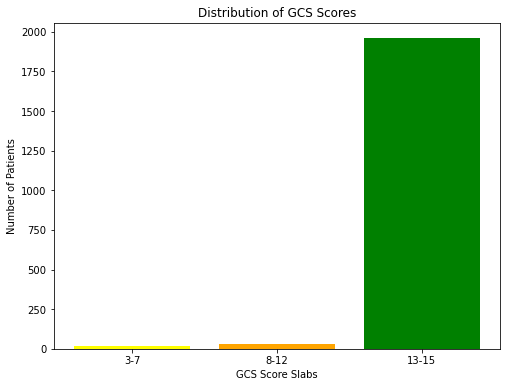

In [13]:
# subsetting the data using position
severe=(Responsivenes.loc[Responsivenes['GCS'].isin([3,4,5,6,7])])
severe
severe_count = len(severe)
severe_count

moderate=(Responsivenes.loc[Responsivenes['GCS'].isin([8,9,10,11,12])])
moderate
moderate_count = len(moderate)
moderate_count

mild=(Responsivenes.loc[Responsivenes['GCS'].isin([13,14,15])])
mild_count = len(mild)
mild_count

gcs_list = ['3-7', '8-12', '13-15']
gcs_count = [severe_count,moderate_count,mild_count]

plt.figure(figsize=(8, 6))
plt.bar(gcs_list, gcs_count, color=['yellow', 'orange', 'green'])
plt.title('Distribution of GCS Scores')
plt.xlabel('GCS Score Slabs')
plt.ylabel('Number of Patients')
plt.show()

### Q3.Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [25]:
#Initialising a temporary variable

temp = Hospitalization_Discharge['dischargeDay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp

# Creating the new column Discharge date 

Hospitalization_Discharge['Discharge_date'] = Hospitalization_Discharge['Admission_date'] + temp
Hospitalization_Discharge['Discharge_date']

0      2017-02-04
1      2017-05-13
2      2016-11-23
3      2017-10-13
4      2019-11-22
          ...    
2003   2016-02-12
2004   2017-04-06
2005   2018-02-05
2006   2019-11-28
2007   2017-02-23
Name: Discharge_date, Length: 2008, dtype: datetime64[ns]

### Q4.What percentage of patients had Biventricular heart failure?

In [28]:
biventricular= CardiacComplications[CardiacComplications["type_of_heart_failure"] == "Both"]
both_count = len(biventricular)
both_count
total_count = len(CardiacComplications)
total_count
percentage = (both_count/total_count)*100

print('Percentage of patients having Biventricular heart failure:',percentage)


Percentage of patients having Biventricular heart failure: 73.70517928286853


### Q5.What is the ratio of patients who were responsive to pain vs responsive to sound?

In [29]:
#Intialising the variables

pain_responsive_count=0
sound_responsive_count=0

for i in Responsivenes['consciousness']:
    if(i=="ResponsiveToSound"):
          sound_responsive_count+=1
    elif i=="ResponsiveToPain":
          pain_responsive_count+=1
            
ratio=sound_responsive_count/pain_responsive_count
print("Pain Responsive Count: ",pain_responsive_count)
print("Sound Responsive Count: ",sound_responsive_count)
print("Ratio of patients responsive to pain vs responsive to sound:", ratio)


Pain Responsive Count:  4
Sound Responsive Count:  19
Ratio of patients responsive to pain vs responsive to sound: 4.75


### Q6.What was the average age group of the patients that had an outcome of 'Alive'?

In [30]:
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    return np.random.randint(age_range[0], age_range[1] + 1)

In [33]:
Alive_Cat_Patients=Hospitalization_Discharge[Hospitalization_Discharge['outcome_during_hospitalization']=="Alive"]
new_df = pd.merge(Alive_Cat_Patients,Demography,on='inpatient_number', how='inner')
Demography['new_age'] =new_df['ageCat'].apply(random_age)
average_age = new_df['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")

Average age of the patients: 74.51


### Q7.Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   float64
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        1981 non-null   object 
 6   ageCat            2008 non-null   object 
dtypes: float64(4), object(3)
memory usage: 109.9+ KB
inpatient_number     0
gender               0
weight               0
height               0
BMI                  0
occupation          27
ageCat               0
dtype: int64


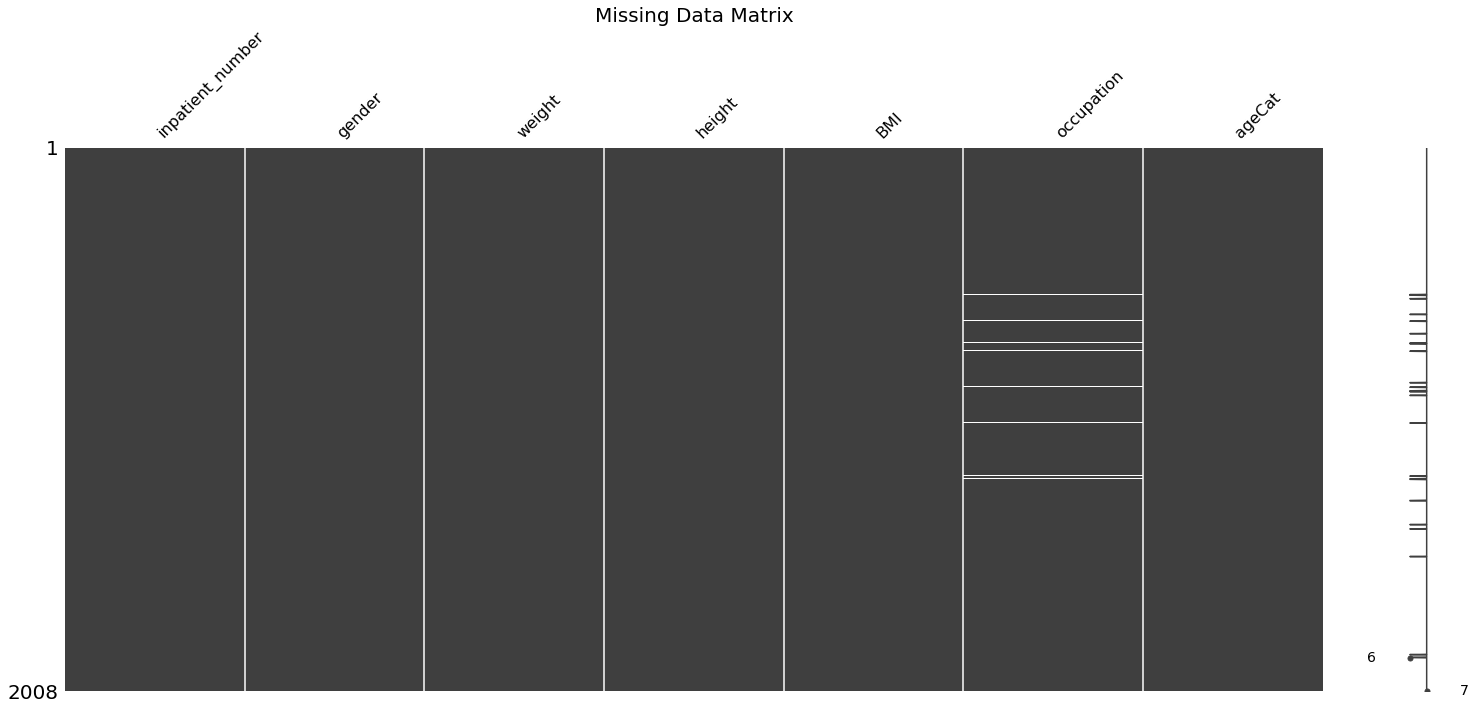

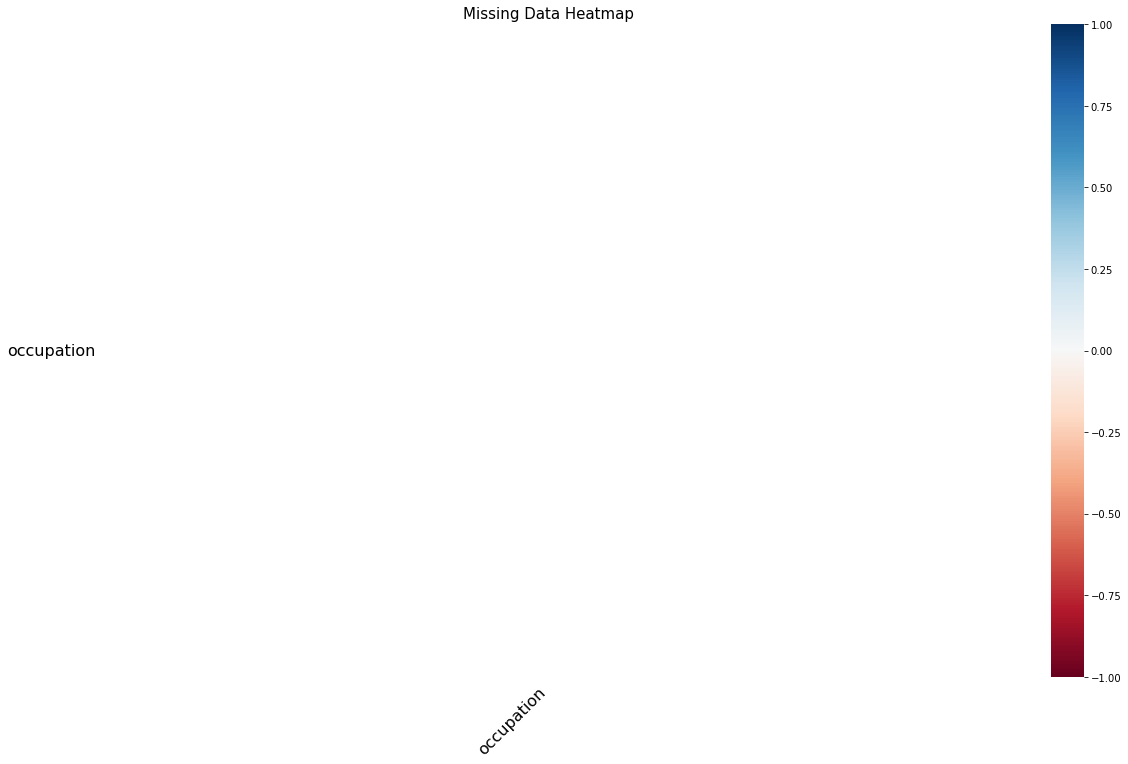

In [34]:
#Using missingno library to visualise the missing data

import missingno as msno 
df1.info()  

msno.matrix(df1)   #missing data matrix
plt.title('Missing Data Matrix',fontsize=20)   #Shows that only occcupation has missing values


msno.heatmap(df1)  #using heatmap to visualise the data
plt.title('Missing Data Heatmap',fontsize = 15)

print(df1.isnull().sum())


### Q8.Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?


C:\Users\apoor\AppData\Local\Temp/ipykernel_27060/796038169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_death']= Hospitalization_Discharge['death_within_28_days']+Hospitalization_Discharge['death_within_3_months']+Hospitalization_Discharge['death_within_6_months']


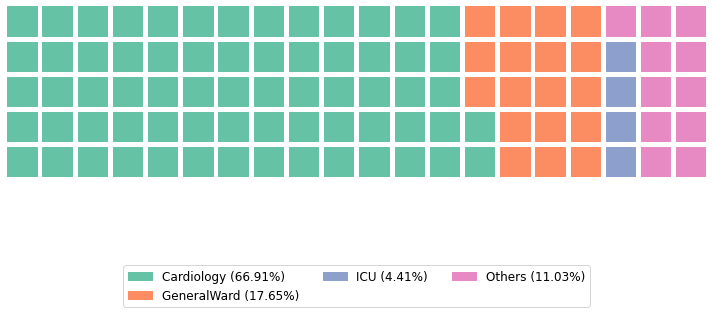

In [35]:
!pip install pywaffle matplotlib
from pywaffle import Waffle

#subsetting the data to required columns
df= Hospitalization_Discharge[['admission_ward','death_within_28_days','death_within_3_months','death_within_6_months']]
df.head()

#calculating total death by adding independent death columns
df['total_death']= Hospitalization_Discharge['death_within_28_days']+Hospitalization_Discharge['death_within_3_months']+Hospitalization_Discharge['death_within_6_months']
df.groupby (['admission_ward','total_death']).size()

#aggregating total death by admission_ward categories
df_group= df.groupby(['admission_ward']).agg('sum').reset_index()
df_group.drop(columns=['death_within_28_days','death_within_3_months','death_within_6_months'], axis=1, inplace=True)

df_group.head()

#calculating percentage of total death
df_group['percentage']=df_group['total_death'].apply(lambda x:(x/df_group['total_death'].sum())*100)
df_group['percentage']= round(df_group['percentage'],2)
df_group

#creating plot labels
plot_labels = [f'{i} ({str(j)}%)' for i,j in zip (df_group.admission_ward,df_group.percentage)]
plot_labels

# Creating a waffle chart
plt.figure(FigureClass=Waffle,figsize=(10,10),rows=5, columns =20,
           values= df_group['percentage'],
           labels=plot_labels,
           legend={'loc':'lower center','bbox_to_anchor':(0.5,-0.8),'ncol':3, 'fontsize':12})
plt.show()

### Q9.Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [16]:
# Example of a program to multiply two matrices using list comprehension

# Consider a 3x3 matrix
A = [[12, 2, 10],
    [27, 8, 6],
    [16, 11, 1]]
 
# Conisder a 3x4 matrix
B = [[6, 3, 7, 0],
    [3, 3, 3, 5],
    [2, 3, 17, 13]]

# The result is a 3x4 matrix
result = [[sum(a1 * b1 for a1, b1 in zip(A_row, B_col)) 
                        for B_col in zip(*B)]
                                for A_row in A]
 
for i in result:
    print('The result is:',i)
 

The result is: [98, 72, 260, 140]
The result is: [198, 123, 315, 118]
The result is: [131, 84, 162, 68]


### Q10.Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph¶

<class 'pandas.core.series.Series'>


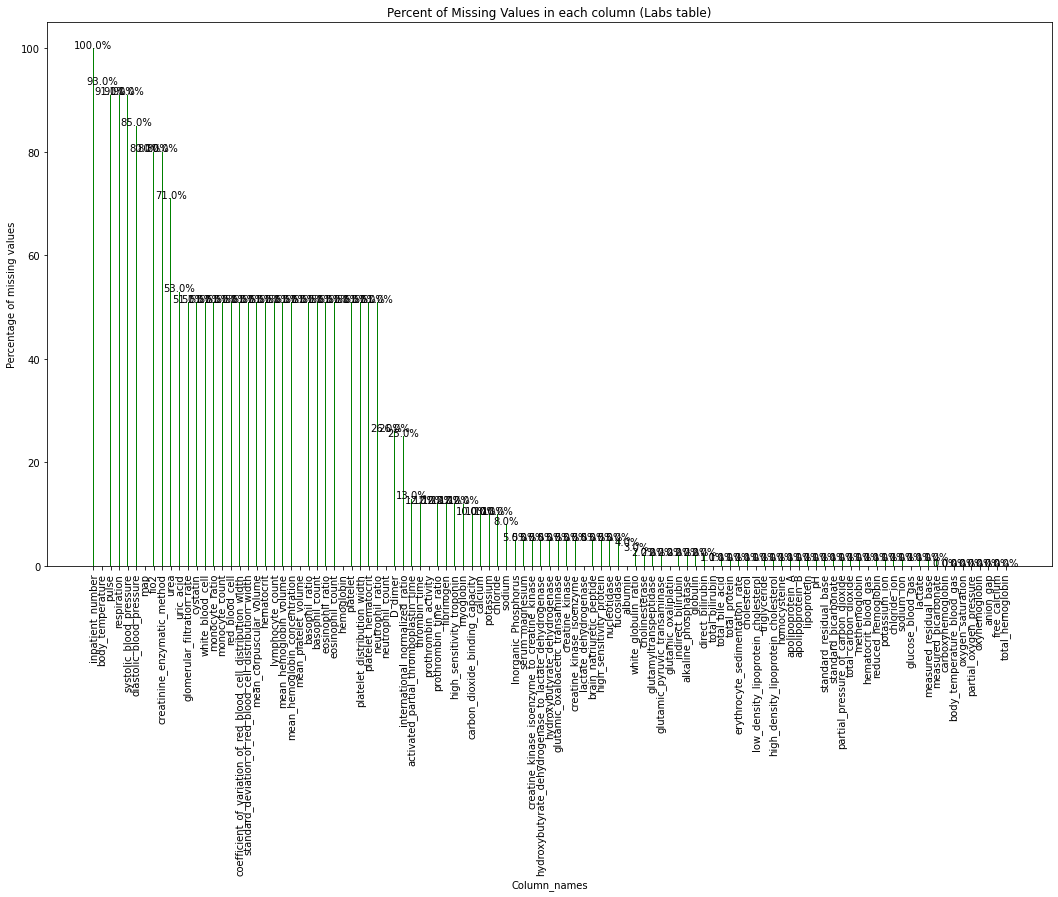

In [44]:
#Calculating the missing values of each column in Labs and converting to percentage
#Since the number of columns in the lab dataset are more than 100, the names of each column are getting overlapped

percent_missing_values = Labs.isnull().mean().round(2)* 100
print(type(percent_missing_values))

# Sorting the missing values in descending order
sorting_missing_values = percent_missing_values.sort_values(ascending=False)

#Defining the x and y lables for the bar graph
x= Labs.columns
y = sorting_missing_values
width = 0.1              # Keeping the width size to a min value to show all the columns clearly
fig, ax = plt.subplots(figsize=(18, 10))

plt.xlabel('Column_names')
plt.xticks(range(len(x)), x, rotation='vertical')   # Showing the column names vertically
plt.ylabel('Percentage of missing values')
plt.title('Percent of Missing Values in each column (Labs table)')
styling = ax.bar(x, y, width, align='center',color='green')

# For calculating the percentage for each column 
for i in styling:
    height = i.get_height()
    ax.text(x=i.get_x() + i.get_width() / 2, y=height+0.050,  #setting the height and width of each column
      s="{}%".format(height),
      ha='center')

plt.show()

### Q11.A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.{2,9587456281,1252478965,7397260044}¶

In [45]:
str_list=['2','9587456281','1252478965','7397260044']
for s in str_list:
    if len(s)==10 and s[0] in ['7','8','9']:
         print("YES")
    else:
         print("NO")  

NO
YES
NO
YES


### Q12.If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [48]:

normal_min = 3.5
normal_max = 5.6

patients_outside_normal_range=CardiacComplications.loc[(CardiacComplications['left_ventricular_end_diastolic_diameter_LV'] < normal_min) | (CardiacComplications['left_ventricular_end_diastolic_diameter_LV'] > normal_max)]
print('Number of patients outside the normal range :',patients_outside_normal_range.shape[0])
patients_outside_normal_range

#subset the data to the required columns
df_cardiac=patients_outside_normal_range[['inpatient_number','left_ventricular_end_diastolic_diameter_LV']]
df_cardiac.shape

#extract the required cols from Labs
df_labs= Labs[['inpatient_number','map']]
df_labs

#merge the two datasets on inpatient column
df_merge= pd.merge(df_cardiac,df_labs, on=['inpatient_number'], how='inner')
df_merge

#dropping ventricular column
df_merge.drop(columns=['left_ventricular_end_diastolic_diameter_LV'], axis=1, inplace=True)
df_merge.head()

#rounding map column
df_merge['map']=round(df_merge['map'],0)
df_merge

#map of most patients
map_count =df_merge['map'].value_counts().reset_index()
map_count

max(map_count['map'])

print(f'The Map of most patients with the left ventricular end diastolic diameter in the normal range is 97 with a maximum occurrence of {map_count["map"].iloc[0]}')




Number of patients outside the normal range : 1311
The Map of most patients with the left ventricular end diastolic diameter in the normal range is 97 with a maximum occurrence of 74


### Q13.Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

In [15]:
#Defining a function to classify temperature
def temperature_range(temp):
    if temp < 35.0:
        return 'Hypothermia'
    elif temp<=37.5:
        return 'Within the range'
    else:
        return 'Hyperthermia'
    

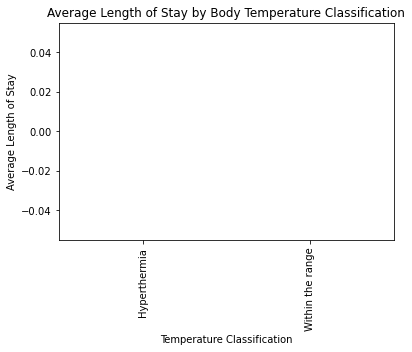

In [17]:
#Creating a new column to store the different temperature ranges

Labs['classify_temperature'] = Labs['body_temperature'].apply(temperature_range)
Labs['classify_temperature']

#Concatenating 2 different sheets
merge_df=pd.concat([Hospitalization_Discharge, Labs], ignore_index=True)
merge_df

#Calculating the length of stay
length_of_stay = merge_df.groupby('classify_temperature')['dischargeDay'].mean()
length_of_stay
length_of_stay.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Temperature Classification')
plt.ylabel('Average Length of Stay')
plt.title('Average Length of Stay by Body Temperature Classification')
plt.show()

### Q14.Find the list of patients whose DischargeDay is greater than the value given by the user

In [57]:
num=int(input("Enter Any Number"))
Result=num<Hospitalization_Discharge['dischargeDay']
print(Hospitalization_Discharge.loc[Result,['inpatient_number','dischargeDay']])

Enter Any Number5
      inpatient_number  dischargeDay
0             857781.0          11.0
1             743087.0           8.0
3             775928.0          11.0
5             823318.0           6.0
6             844094.0          10.0
...                ...           ...
2001          726701.0          10.0
2002          754589.0           8.0
2004          734280.0           8.0
2005          781004.0          14.0
2007          791864.0           6.0

[1580 rows x 2 columns]


### Q15.Display a pie chart of number of patients in each category listed -death_within_28_days re_admission_within_28_days -death_within_3_months -re_admission_within_3_months -death_within_6_months -re_admission_within_6_months -return_to_emergency_department_within_6_months

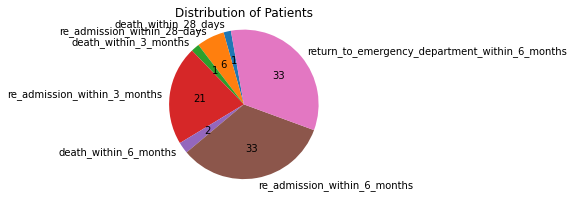

In [58]:
df_test=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
data_test=df_test[["death_within_28_days", "re_admission_within_28_days", "death_within_3_months","re_admission_within_3_months","death_within_6_months",
                   "re_admission_within_6_months","return_to_emergency_department_within_6_months"]]
data_test.groupby(["death_within_28_days", "re_admission_within_28_days", "death_within_3_months","re_admission_within_3_months","death_within_6_months",
                   "re_admission_within_6_months","return_to_emergency_department_within_6_months"])
#display(data_test)
plt.figure(figsize=(3, 3))

counts = data_test.sum()

# Convert counts to strings for labels
labels = [str(label) for label in counts.index]

plt.pie(counts, labels=labels, startangle=100, autopct='%d')
plt.title("Distribution of Patients")Q
plt.axis('equal')  
plt.show()

### Q16.Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [59]:
merge_df = pd.merge(CardiacComplications, Labs, on=['inpatient_number'])
merge_df = pd.merge(merge_df, Demography, on=['inpatient_number'])
pivot_df = pd.melt(merge_df, id_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                   value_vars=['uric_acid', 'BMI'], var_name='Metric', value_name='Value')

pivot_table = pivot_df.pivot_table(index=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                                 columns='Metric',values='Value', aggfunc='mean')  
pivot_table

Metric                                                                            BMI  \
myocardial_infarction congestive_heart_failure peripheral_vascular_disease              
0.0                   0.0                      0.0                          21.688675   
                      1.0                      0.0                          21.761582   
                                               1.0                          22.724937   
1.0                   0.0                      0.0                          20.049487   
                      1.0                      0.0                          21.661325   
                                               1.0                          22.845834   

Metric                                                                       uric_acid  
myocardial_infarction congestive_heart_failure peripheral_vascular_disease              
0.0                   0.0                      0.0                          485.539683  
                      1.0                      0.0                          480.717178  
                                               1.0                          482.539326  
1.0                   0.0                      0.0                          565.900000  
                      1.0                      0.0                          499.558333  
                                               1.0                          549.300000

### Q17.Using arrays and loops find the number of patients who were Admitted in the month of November

In [4]:
count=0
for date in Hospitalization_Discharge['Admission_date']:
    #checking for tthe month
  if date.month == 11:
    count+=1
print("Number Of Patients Admitted in November:",count)

Number Of Patients Admitted in November: 195


### Q18. Create a heatmap on any columns of your choice including at least 1 lab value

<Axes: ylabel='ageCat'>

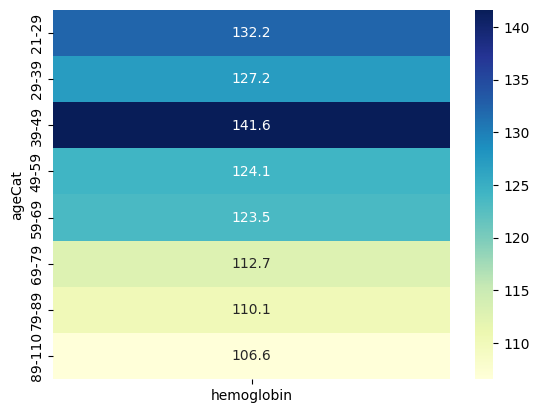

In [5]:
# importing seaborn library
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np

# merging labs and demography datasets
df7=Labs.merge(Demography,on='inpatient_number')

# creating a new dataframe df7 with only he columns gender, ageCat, hemoglobin
df7=df7.loc[:,['gender','ageCat','hemoglobin']]

#calculating the average hemoglobin values for each age group
hem_agecat= df7.groupby('ageCat').mean('hemoglobin')

# generating heat map for these age categories and their avg Hemoglobin values
sns.heatmap(hem_agecat, annot=True, cmap='YlGnBu', fmt='.1f')

### Q19.Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

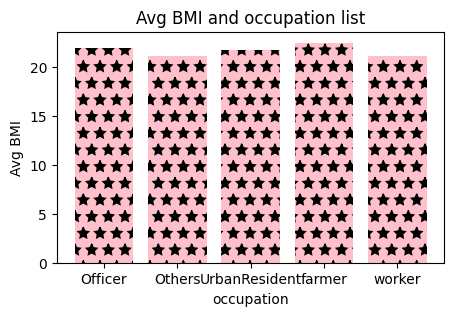

In [6]:
avg_bmi=Demography.groupby('occupation')['BMI'].mean()
plt.figure(figsize=(5,3))
barchart=plt.bar(avg_bmi.index,avg_bmi.values,color='pink')
# Adding hatch onto the bar
for x in barchart:
    x.set_hatch('*')
plt.title("Avg BMI and occupation list")
# labeling x-axis and y-axis
plt.xlabel("occupation")
plt.ylabel("Avg BMI")
plt.show()

### Q20.You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n .
### Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n.
### x=1, y=1, z=2, n=3

In [7]:
x, y, z, n = 1, 1, 2, 3
print([(i, j, k) for i in range(x + 1) for j in range(y + 1)
  for k in range(z + 1) if i + j + k != n])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 2)]


### Q21.Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.

In [8]:
def Sort(python_students):
    l = len(python_students)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (python_students[j][1] > python_students[j + 1][1]):
                temp = python_students[j]
                python_students[j] = python_students[j + 1]
                python_students[j + 1] = temp
    return python_students

# Input list
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
sort_students=Sort(python_students)
# Printing the sorted list 
print(sort_students)
second_lowest_grade=sort_students[1][1]
print("Second Lowest Grade:",second_lowest_grade)
second_lowest_students = [student[0] for student in sort_students if student[1] == second_lowest_grade]
for name in second_lowest_students:
    print(name)

[['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]
Second Lowest Grade: 37.21
Harry
Berry


### Q22. Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [9]:
max_count_value = Patient_Prescriptions['inpatient_number'].value_counts().idxmax()
print("Patient with maximum prescriptions is: ",max_count_value)
# Find age and outcome for the patient with the maximum count value
age = None
outcome = None

# Checking df5 for age range
if Demography[Demography['inpatient_number'] == max_count_value].shape[0] > 0:
    age =Demography[Demography['inpatient_number'] == max_count_value]['ageCat'].iloc[0]
# Checking df for outcome
if Hospitalization_Discharge[Hospitalization_Discharge['inpatient_number'] == max_count_value].shape[0] > 0:
    outcome = Hospitalization_Discharge[Hospitalization_Discharge['inpatient_number'] == max_count_value]['outcome_during_hospitalization'].iloc[0]

print("Age Range:", age)
print("Outcome:", outcome)

Patient with maximum prescriptions is:  777204
Age Range: 79-89
Outcome: Alive


### Q23.How many patients were prescribed Digoxin?

In [11]:
Patient_Prescriptions.head(2)
count=0
# checking for the Digoxin drug
for drug in Patient_Prescriptions['Drug_name']:
    if drug=="Digoxin tablet":
     count+=1
print("Number of Patients Prescribed Digoxin are :",count)

Number of Patients Prescribed Digoxin are : 999


### Q24.What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

0       15.8748
1       13.8196
2       17.4508
3       11.3908
4       14.5512
         ...   
2003    15.2728
2004    12.0148
2005    21.5632
2006    16.1144
2007    14.0648
Length: 2008, dtype: float64


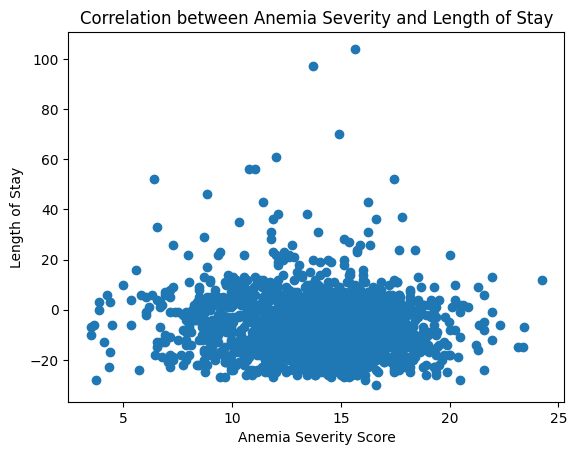

In [12]:
#Below are the columns responsible for causing anemia to cardiac patients.

df9 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=4)
df10 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=0)

# moderate_to_severe_chronic_kidney_disease = df9['moderate_to_severe_chronic_kidney_disease']
# congestive_heart_failure = df9['congestive_heart_failure']
hemoglobin = df9['hemoglobin']
hematocrit = df9['hematocrit']

# As per World Health Organization considering gender-independent cutoff 12 g/dL of hemoglobin per deciliter to 
# identify more patients as being anemic 
# Considering the normal average hematocrit percentage for men and women being 40%

weighted_score = ((df9['hemoglobin'] * 0.12) + (df9['hematocrit'] *.4))
print(weighted_score)

#  Creating a new column to display the severity score of anemia pateints
df9['Anemia_Severity_Score'] = weighted_score
df9['length_of_stay'] = df10['dischargeDay'] - df10['Admission_date'].dt.day
df9['length_of_stay']
plt.scatter(df9['Anemia_Severity_Score'], df9['length_of_stay'])
plt.xlabel('Anemia Severity Score')
plt.ylabel('Length of Stay')
plt.title('Correlation between Anemia Severity and Length of Stay')
plt.show()

### Q25. Using GCS score, how many patients are considered to be in a coma?

In [13]:
patient_coma_count=0
# checking for coma patients with GCS score
for i in Responsivenes['GCS']:
    if i<=8:
      patient_coma_count+=1
print("Number Of Patients In Coma Are: ",patient_coma_count)

Number Of Patients In Coma Are:  19


### Q26. Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [14]:
import numpy as np
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    # generating random age using randint()
    return np.random.randint(age_range[0], age_range[1] + 1)
Demography['new_age'] = Demography['ageCat'].apply(random_age)
# calculating average age for the new age column
average_age = Demography['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")
Demography

Average age of the patients: 74.45


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,new_age
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,73
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,75
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,60
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,72
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,72
...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,84
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,80
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,43
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,53


### Q27.Using the age column generated in Q.26, calculate year of birth for each patient

In [15]:
import datetime
now = datetime.datetime.now()
#generating the current year
current_year = now.year
# finding the year of borned
Demography['year_of_birth']=current_year-Demography['new_age']
Demography

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,new_age,year_of_birth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,73,1951
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,75,1949
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,60,1964
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,72,1952
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,72,1952
...,...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,84,1940
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,80,1944
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,43,1981
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,53,1971


### Q28.Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [16]:
# Get the column info
Patient_Num= Demography['inpatient_number']
Gender = Demography['gender']
result = []
for i in range(len( Patient_Num)):
     #Adding to result based on indexes
     result.append(( Patient_Num[i], Gender[i]))
for j in range(min(10, len(result))):
 print(result[j])

(857781, 'Male')
(743087, 'Female')
(866418, 'Male')
(775928, 'Male')
(810128, 'Female')
(823318, 'Female')
(844094, 'Male')
(787530, 'Female')
(795420, 'Female')
(829801, 'Female')


### Q29.What percentage of those in a coma also have diabetes?

In [17]:
merge_data = Responsivenes.merge(PatientHistory)
# counting coma patients
coma_count = merge_data[merge_data['GCS'] <= 8].shape[0]
# counting patients with coma and diabetes
coma_diabetes_count = merge_data[(merge_data['diabetes'] == 1) & (merge_data['GCS'] <= 8)].shape[0]
print("coma_diabetes_count: ",coma_diabetes_count)
print("coma_count: ",coma_count)
#finding the percentage of those in coma also have diabetes
if coma_count > 0:
    result = (coma_diabetes_count / coma_count) * 100
    print(f"Percentage of patients in a coma who also have diabetes: {result:.2f}%")
else:
    print("No patients in a coma found in the dataset.")


coma_diabetes_count:  2
coma_count:  19
Percentage of patients in a coma who also have diabetes: 10.53%


### Q30. Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [18]:
# Initialize LVEF_Score column
CardiacComplications['LVEF_Score'] = 0  

# Calculate LVEF_Score for each LVEF value
for i, LVEF in enumerate(CardiacComplications['LVEF']):
    if LVEF >= 55:
        CardiacComplications.at[i, 'LVEF_Score'] = 0
    elif 40 <= LVEF <= 54:
       CardiacComplications.at[i, 'LVEF_Score'] = 1
    elif 30 <= LVEF <= 39:
        CardiacComplications.at[i, 'LVEF_Score'] = 2
    else:
       CardiacComplications.at[i, 'LVEF_Score'] = 3

# Calculate Severity Score
CardiacComplications['Severity_Score'] = CardiacComplications['LVEF_Score'] +CardiacComplications['mitral_valve_EMS'] + CardiacComplications['mitral_valve_AMS'] + CardiacComplications['EA']
# assigning df column to df1
CardiacComplications['outcome_column_name'] = Hospitalization_Discharge['outcome_during_hospitalization']
# finding average scores for each outcome
average_scores = {}
for outcome in CardiacComplications['outcome_column_name'].unique():
    average_scores[outcome] = CardiacComplications[CardiacComplications['outcome_column_name'] == outcome]['Severity_Score'].mean()
# printing the averages for each outcome
print("Average Severity Score for Each Outcome:")
print(average_scores)

Average Severity Score for Each Outcome:
{'Alive': 5.311840871934605, 'Dead': 3.821333333333333, 'DischargeAgainstOrder': 3.6080454545454548}


### Q31.Group the days to re-admission into bins and count how many patients were in each bin

In [19]:
bin = [0, 50, 100, 150, 200,250,300,350,400,450,500]
# bin the readmission_time_days_from_admission column
bin_count = pd.cut(Hospitalization_Discharge['readmission_time_days_from_admission'], bin).value_counts()
print(bin_count)

readmission_time_days_from_admission
(0, 50]       274
(50, 100]     257
(100, 150]    128
(150, 200]     71
(200, 250]     58
(250, 300]     34
(350, 400]     22
(300, 350]     21
(450, 500]      8
(400, 450]      7
Name: count, dtype: int64


### Q32.Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

([<matplotlib.patches.Wedge at 0x29ec7d64910>,
 [Text(0.269900580191181, 1.169253469874032, 'Cardiology NonEmergency'),
  Text(-0.8935461674585818, -0.6415413054668265, 'Cardiology Emergency'),
  Text(0.4619319887459488, -0.9983079874333436, 'GeneralWard Emergency'),
  Text(0.8803140870178159, -0.6595810095795583, 'Others NonEmergency'),
  Text(1.0354809225047192, -0.3711862862886717, 'GeneralWard NonEmergency'),
  Text(1.0891131681405644, -0.15437780599173848, 'Others Emergency'),
  Text(1.0996109524378002, -0.029253260994870897, 'ICU Emergency'),
  Text(1.099994615372118, -0.003441823985392837, 'ICU NonEmergency')],
 [Text(0.15744200511152223, 0.6820645240931853, '42.78%'),
  Text(-0.48738881861377187, -0.34993162116372356, '34.26%'),
  Text(0.2519629029523357, -0.5445316295090964, '9.71%'),
  Text(0.48017132019153586, -0.35977145977066816, '6.03%'),
  Text(0.564807775911665, -0.20246524706654817, '3.49%'),
  Text(0.5940617280766715, -0.0842060759954937, '2.99%'),
  Text(0.5997877922

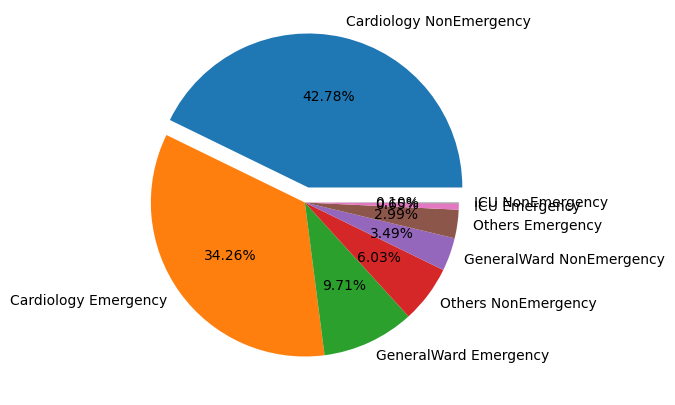

In [20]:
Hospitalization_Discharge['adm_ward_way']=Hospitalization_Discharge['admission_ward']+' '+Hospitalization_Discharge['admission_way']
adm_count=Hospitalization_Discharge['adm_ward_way'].value_counts()
plt.figure(figsize=(5,5))
explodes=[0.1 if count == adm_count.idxmax() else 0 for count in adm_count.index]
# creating pie chart with percentages 
plt.pie(adm_count,labels=adm_count.index,explode=explodes,autopct="%0.2f%%")

### Q33 Retrieve the row with minimum white_blood_cell count using sorting technique.

In [ ]:
#sorting using sort_values method
Labs = Labs.sort_values('white_blood_cell')

#retriving the values from the first row after sorting, gives the minimum row value
Labs.head(1)

#retriving the first row(with minimum wbc count) using iloc - gets rows (and/or columns) at integer locations.
Labs.iloc[:1]

### Q34	get the last letter of discharge_department of patients using RegEX

In [ ]:
#importing regular expression
import re

In [ ]:
# pattern to match the last letter
pattern=r'([A-Za-z])$'

#looping discharge_department in for loop
for s in Hospitalization_Discharge['discharge_department']:
     match = re.search(pattern,s)
     # extract and print the last letter
     last_letter = match.group(1)
     print("Last letter:", last_letter)

### Q35	find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)

In [ ]:
#fetch the string input
Original_Str=input("Enter Any String: ")

#split the string into words
str1 = Original_Str.split()[::-1]
str2 = []

#loop the words
for i in str1:
    # appending words from last to str2
    str2.append(i)
    # printing reverse words
    print(" ".join(str2))

### Q36	Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() ** ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** ** Plot (x,y) on that axes and set the labels.

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(0,10,100)
y=np.sin(x) * np.cos(x)
# creating figure object
fig=plt.figure()
ax_fig=fig.add_axes([0,0,1,1])
ax_fig.plot(x, y) 
# set labels for x-axis and y-axis
ax_fig.set_xlabel('X-axis')
ax_fig.set_ylabel('Y-axis') 
plt.show()   

### Q37	Using dischargeDay values print even if it even number and odd if it odd number


In [ ]:
#looping the dischargeDay values
for i in Hospitalization_Discharge['dischargeDay']:
 # checking even or odd
    if i%2 == 0:
      print("even")
    else:
      print("odd")

### Q38	find the length of Tuple for any given input (Hint: Input a string from user )

In [ ]:
# getting the input
my_tuple = tuple(input('Enter space-separated words: ').split())
print(my_tuple)
length=len(my_tuple)
print("Tuple length is: ",length)

### Q39 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


#intialising x and y values
x = np.arange(0, 10, 0.1) 
y = np.sin(np.pi * x) + x 

#To create a 2*2 suplots
fig,axs = plt.subplots(2,2,figsize=(12,8))

#creating sin wave
axs[0,0].plot(x,y)
axs[0,0].set_title('Sin Wave')

#creating cos wave
y = np.cos(np.pi * x) + x 

axs[0,1].plot(x,y)
axs[0,1].set_title('Cos Wave')

#creating tan wave
y = np.tan(np.pi * x) + x 

axs[1,0].plot(x,y)
axs[1,0].set_title('Tan Wave')

#creating Exponential curve
y = np.exp(np.pi * x) + x 

axs[1,1].plot(x,y)
axs[1,1].set_title('Exponential curve');

### Q40	Select 25 different random values between 200 to 800.


In [ ]:
import random

In [ ]:
Rand_values= random.sample(range(200,800),25)
print(Rand_values)

### Q41	Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


In [ ]:
patient_count=Hospitalization_Discharge.groupby(pd.Grouper(key='Admission_date',freq='5M')).size()
plt.figure(figsize=(10,6))
patient_count.plot(marker='o',linestyle='-')
plt.title("Admission dates with count of patients")
plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.show()

### Q42	np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19.  When the value is less than 9, print as 0,else print 1


In [ ]:
#creating an array 
array1=np.arange(1,21).reshape(4,5)
#print(array1)
slice_part=[1,2,8,19]

#slicing the 1,2,8,19th elements from the array using where
slice= np.isin(array1,slice_part)

gtr = np.where(array1 <= 8, 0, 1)

result = np.where(slice, gtr, -1)

print(result)

### Q43 Give Distribution chart of max Killip_grade

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 

# merging CardiacComplications and demography datasets
df_kill =df1.merge(df5,on='inpatient_number')

# creating a new dataframe df_agpul with only he columns inpatient_number, pulse, ageCat
df_kill = df_kill.loc[:,['inpatient_number','Killip_grade','ageCat']]

#getting only the rows with killip_grade=4, which is the max value
df_kill = df_kill.loc[df_kill['Killip_grade'] == 4,:]
df_kill.head()

#counting for each age categ and then sorting
df_kill_agecat= df_kill.ageCat.value_counts().reset_index()
df_kill_agecat = df_kill_agecat.sort_values('ageCat')
df_kill_agecat

#creating a bar graph between age categ and their killip counts
plt.figure(figsize=(8, 6))
bars1=plt.bar(df_kill_agecat['ageCat'], df_kill_agecat['count'], width=0.4, label='Value1', color='skyblue')
plt.title('Distribution chart of max Killip_grade')
plt.xlabel('AgeCat')
plt.ylabel('Count of patients with killip grade=4')
plt.grid(axis='y')


### Q44	Based on Q26 and 27 display all demographic details of patients who are born in year 1945


In [ ]:
patients_1945_birth=df5[df5['year_of_birth']==1945]
patients_1945_birth
[11:52 AM, 5/4/2024] Ch Santhi Da100: for 44 th question you have to run 26 and 27 questions
[11:53 AM, 5/4/2024] Ch Santhi Da100: 26) import numpy as np
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    return np.random.randint(age_range[0], age_range[1] + 1)
df5['new_age'] = df5['ageCat'].apply(random_age)
average_age = df5['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")

### Q45 Create a dataframe with date and time as columns, where the values are the admission time

In [ ]:
#creating a dataframe using Admission_date variable from Hospitalization_Discharge
df_date = pd.DataFrame({'Adm_date_tm':df0['Admission_date']})
df_date['date'] = df_date['Adm_date_tm'].dt.date
df_date['time'] = df_date['Adm_date_tm'].dt.time
df_date.head()


### Q46 Convert occupation into numeric by Label encoding


In [ ]:
#importing LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder() and store it in labelencoder variable/object le
lbl_enc = LabelEncoder()

#Apply fit for the occupation column
df5.occupation=lbl_enc.fit_transform(df5.occupation)


distinct_occu = df5.occupation.value_counts(dropna=False)
distinct_occu

### Q47	Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.


In [ ]:
# Manually set the values in the array
fixed_array = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])
print("\nFixed Array:")
print(fixed_array)

### Q48	Using loops, create a multiplication table for the number 7


In [ ]:
num = 7

# Define the range of numbers for the multiplication table (e.g., 1 to 10)
start = 1
end = 10

# Iterate through each number in the range and print its multiplication with 7
for i in range(start, end + 1):
    # Calculate the result of the multiplication
    result = num * i
    # Print the multiplication expression and the result
    print(f"{num} * {i} = {result}")

### Q50 Display the lab details of the patient with maximum pulse using the .loc

In [22]:
data=Labs.loc[Labs['pulse'].idxmax()]
data

inpatient_number           756996.00
body_temperature               36.00
pulse                         198.00
respiration                    19.00
systolic_blood_pressure       105.00
                             ...    
partial_oxygen_pressure       125.00
oxyhemoglobin                  97.60
anion_gap                      12.50
free_calcium                    1.07
total_hemoglobin              132.00
Name: 457, Length: 107, dtype: float64

###  Q51 Display a violin chart to show distribution of Pulse Rate against age.

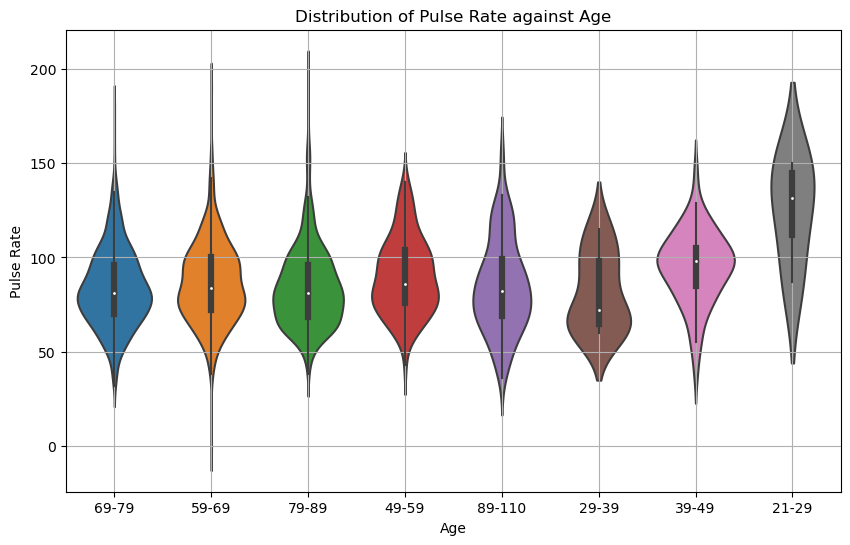

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline
# merging Lab and demography datasets
df_agpul =Labs.merge(Demography,on='inpatient_number')
# creating a new dataframe df_agpul with only he columns inpatient_number, pulse, ageCat
df_agpul = df_agpul.loc[:,['inpatient_number','pulse','ageCat']]
df_agpul.head()
#creating violin plot to show distribution of Pulse Rate against age
plt.figure(figsize=(10, 6))
sns.violinplot(x='ageCat', y='pulse', data=df_agpul)
plt.title('Distribution of Pulse Rate against Age')
plt.xlabel('Age')
plt.ylabel('Pulse Rate')
plt.grid(True)



###  Q52 Create a Point Plot on Age against time to readmission.

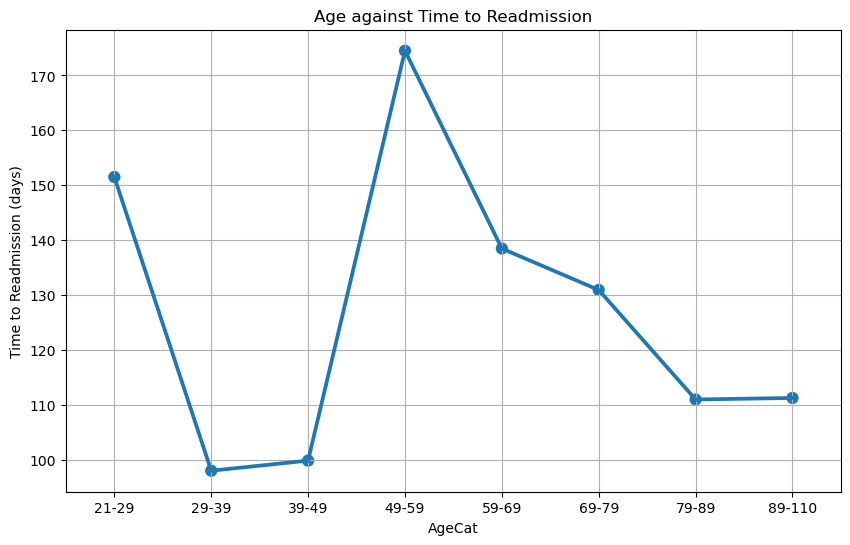

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline
# merging Hospitalization_Discharge and demography datasets
df_agre =Hospitalization_Discharge.merge(Demography,on='inpatient_number')
# creating a new dataframe df_agre with only he columns inpatient_number, readmission_time_days_from_admission, ageCat
df_agre = df_agre.loc[:,['inpatient_number','readmission_time_days_from_admission','ageCat']]
#dropping all the null values - who are not readmitted
df_agre = df_agre.dropna()
#finding average days of readmission for each group
df_age_read = df_agre.groupby('ageCat')['readmission_time_days_from_admission'].mean().reset_index()
#creating point plot on Age_category against time to readmission
plt.figure(figsize=(10, 6))
sns.pointplot(x='ageCat', y='readmission_time_days_from_admission', data=df_age_read)
plt.title('Age against Time to Readmission')
plt.xlabel('AgeCat')
plt.ylabel('Time to Readmission (days)')
plt.grid(True)

### Q53 What is the correlation between CCI score and outcome?


In [25]:
Hospitalization_Discharge['outcome'] = Hospitalization_Discharge['outcome_during_hospitalization'].map({'Alive': 1, 'Dead': 0})
correlation = PatientHistory['CCI_score'].corr(Hospitalization_Discharge['outcome'])
correlation

-0.03463464746416439

### Q54 For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [26]:
list1 = [0,1,2,6,8]
for i in list1:
    if i > 0 and i%2 == 0:
        print(i*i)
    else:
        print('Only even numbers')

Only even numbers
Only even numbers
4
36
64


### Q55 Create a jointplot on diastolic_blood_pressure & length of stay

C:\Users\Dhiren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dhiren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



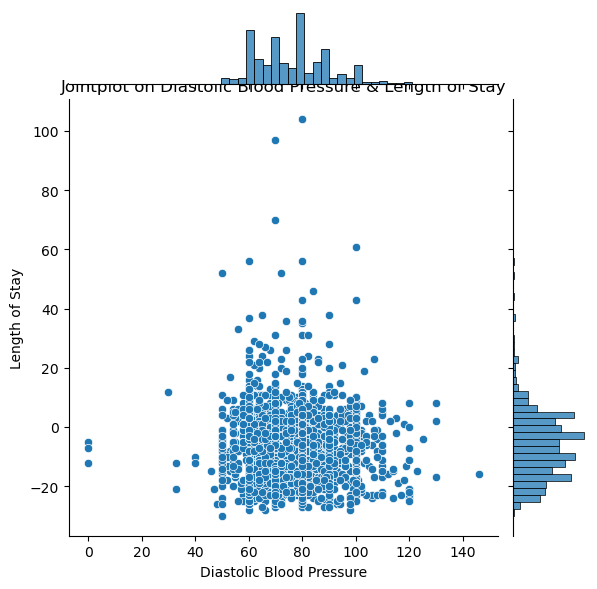

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
#  New_df is the merged DataFrame
New_df=Hospitalization_Discharge.merge(Labs)
# Calculate length of stay
New_df['length_of_stay'] = New_df['dischargeDay'] - New_df['Admission_date'].dt.day
# plotting the jointplot
sns.jointplot(data=New_df, x='diastolic_blood_pressure', y='length_of_stay')
plt.title('Jointplot on Diastolic Blood Pressure & Length of Stay')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Length of Stay')
plt.show()

### Q56 Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [29]:
#Kalyani
import pandas as pd
import numpy as np
#Hospitalization_Discharge
Hospitalization_Discharge = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=0)
#CardiacComplications
CardiacComplications = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=1)
#Responsivenes
Responsivenes = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=2)
#PatientHistory
PatientHistory = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=3)
#Labs
Labs = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=4)
#Demography
Demography = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=5)
#Patient_Precriptions
Patient_Precriptions = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=6)

df7=Demography.loc[101:201, ['weight','ageCat']]
df7

,weight,ageCat
101,41.0,69-79
102,64.0,79-89
103,61.0,79-89
104,40.0,79-89
105,73.0,69-79
...,...,...
197,50.0,79-89
198,50.0,89-110
199,50.0,69-79
200,63.0,59-69


### Q57 Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values

In [30]:
pivot_table = pd.pivot_table(Hospitalization_Discharge,index=['outcome_during_hospitalization'],columns=['admission_ward'],aggfunc='size')
pivot_table

admission_ward,Cardiology,GeneralWard,ICU,Others
outcome_during_hospitalization,,,,
Alive,1472,238,12,168
Dead,8,1,1,1
DischargeAgainstOrder,67,26,2,12


### Q58 Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

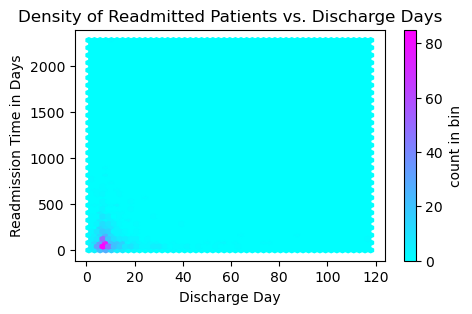

In [33]:
#Hexagon
import matplotlib.pyplot as plt
# Considering the data from Hospital_Discharge
plt.figure(figsize=(5, 3))
#Hexbin plot using Seaborn
plt.hexbin(Hospitalization_Discharge['dischargeDay'], Hospitalization_Discharge['readmission_time_days_from_admission'], gridsize=50, cmap='cool')
plt.colorbar(label='count in bin')
# giving label names to x-axis and y-axis
plt.xlabel('Discharge Day')
plt.ylabel('Readmission Time in Days')
# giving title for the chart
plt.title('Density of Readmitted Patients vs. Discharge Days')
plt.show()

### Q59 Using Sunburst chart display patients Age group, occupation and BMI Group

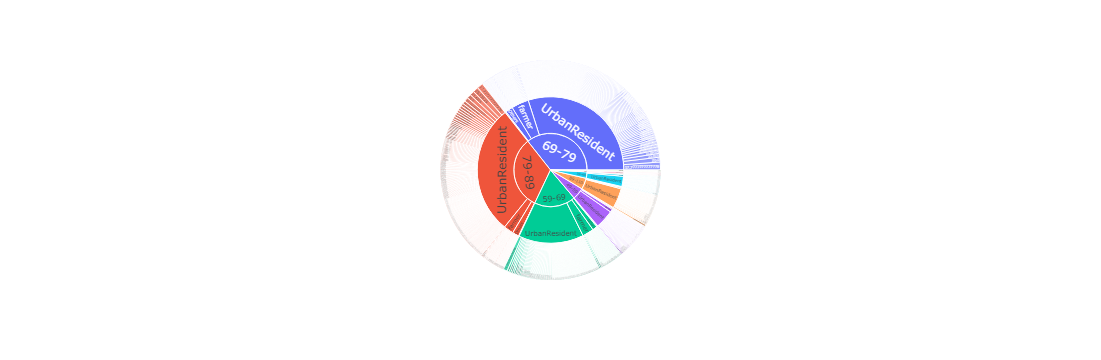

In [34]:
import plotly.express as px
Demography_new=Demography.dropna()
fig = px.sunburst(Demography_new, path=['ageCat', 'occupation', 'BMI'])
fig.show()

###  Q60 Plot the Density Chart for visit times¶

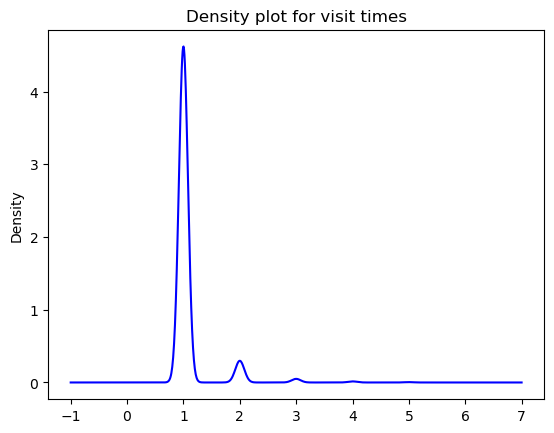

In [36]:
Hospitalization_Discharge.visit_times.plot.density(color='blue')
plt.title('Density plot for visit times')
plt.show()

### Q61 Find the array slicing to get the elements with values 11,12,16,17.

In [37]:
#creating an array
array1=np.arange(1,31).reshape(6,5)
#print(array1)
#slicing the 11,12,16,17th elements from the array using where
slice=np.where(np.isin(array1,[11,12,16,17]))
#printing the slice
print(array1[slice])

[11 12 16 17]


###  Q62 What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

In [38]:
#percentage of patients who are alive and dead within 28 days
patients_alive_dead_within_28_days_mean_platelet_volume = pd.merge(Hospitalization_Discharge,Labs,on = 'inpatient_number')
patients_alive_dead_within_28_days_mean_platelet_volume
patients_alive_and_died_within_28days = patients_alive_dead_within_28_days_mean_platelet_volume .loc[(patients_alive_dead_within_28_days_mean_platelet_volume['outcome_during_hospitalization'] == 'Alive') & (patients_alive_dead_within_28_days_mean_platelet_volume['death_within_28_days'] == 1)]
count_of_patients_alive_and_died_within_28days = len(patients_alive_and_died_within_28days)
count_of_patients_alive_and_died_within_28days
count_of_total_patients = len(Hospitalization_Discharge)
count_of_total_patients
percentage_of_patients_alive_and_dead_within_28days = (count_of_patients_alive_and_died_within_28days/count_of_total_patients)*100
percentage_of_patients_alive_and_dead_within_28days
print('percentage_of_patients_alive_and_dead_within_28days:',percentage_of_patients_alive_and_dead_within_28days)
#Finding mean platelet value among the group
patients_alive_dead_within_28_days_mean_platelet_volume [['inpatient_number','outcome_during_hospitalization', 'mean_platelet_volume']]
print('Mean platelet value among patients alive and dead withinn 28 days:\n',patients_alive_and_died_within_28days['mean_platelet_volume'])



percentage_of_patients_alive_and_dead_within_28days: 0.398406374501992
Mean platelet value among patients alive and dead withinn 28 days:
 43      12.4
74      14.3
94      11.9
140     12.8
398     13.4
505     10.4
569     11.3
1339    14.3
Name: mean_platelet_volume, dtype: float64


### Q63 find the patients who have 'h' in their DestinationDischarge and print them


In [39]:
data=Hospitalization_Discharge[Hospitalization_Discharge['DestinationDischarge'].str.contains('h',na=False)]
print(data[['inpatient_number','DestinationDischarge']])

      inpatient_number DestinationDischarge
7               787530   HealthcareFacility
18              820101   HealthcareFacility
22              868777   HealthcareFacility
29              861240   HealthcareFacility
31              814480   HealthcareFacility
...                ...                  ...
2001            726701   HealthcareFacility
2002            754589   HealthcareFacility
2003            740689   HealthcareFacility
2004            734280   HealthcareFacility
2005            781004   HealthcareFacility

[438 rows x 2 columns]


### Q64 Create a grouped bar chart that shows number of patients by gender and ageCat

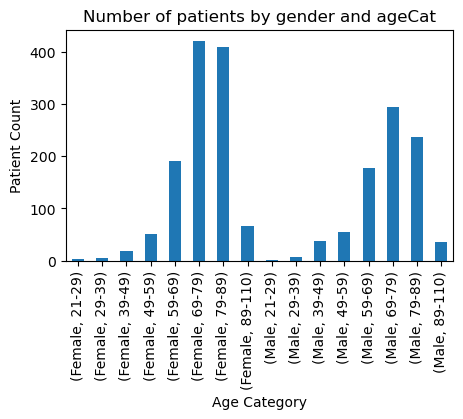

In [40]:
data=Demography.groupby(['gender','ageCat']).size()
data.plot(kind='bar',figsize=(5,3))
plt.title("Number of patients by gender and ageCat")
plt.xlabel('Age Category')
plt.ylabel('Patient Count')
plt.show()